2D Map Eval

In [12]:
#model_types = ["articles_large.index", "articles.index", "articles_incl_ARG"]
model_type = "articles_large.index"

Article ID: 0, Distance: 0.0
Article ID: 197, Distance: 0.7083922624588013
Article ID: 195, Distance: 0.7371349334716797
Article ID: 270, Distance: 0.7473189830780029
Article ID: 237, Distance: 0.7609228491783142


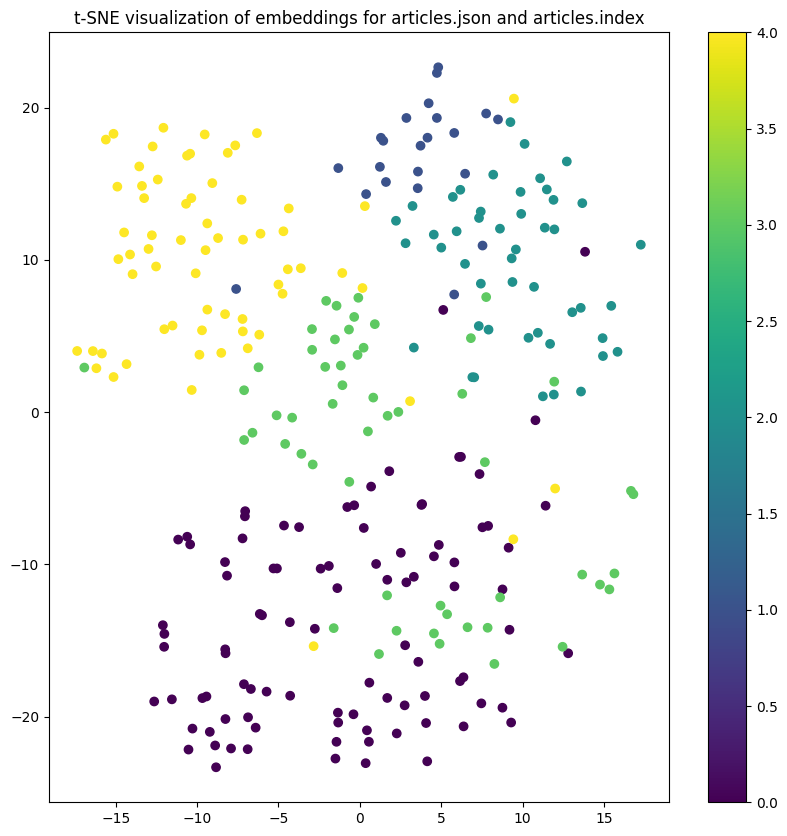

Article ID: 0, Distance: 0.0
Article ID: 195, Distance: 0.6746934652328491
Article ID: 197, Distance: 0.7724854946136475
Article ID: 184, Distance: 0.7762693762779236
Article ID: 1, Distance: 0.7864160537719727


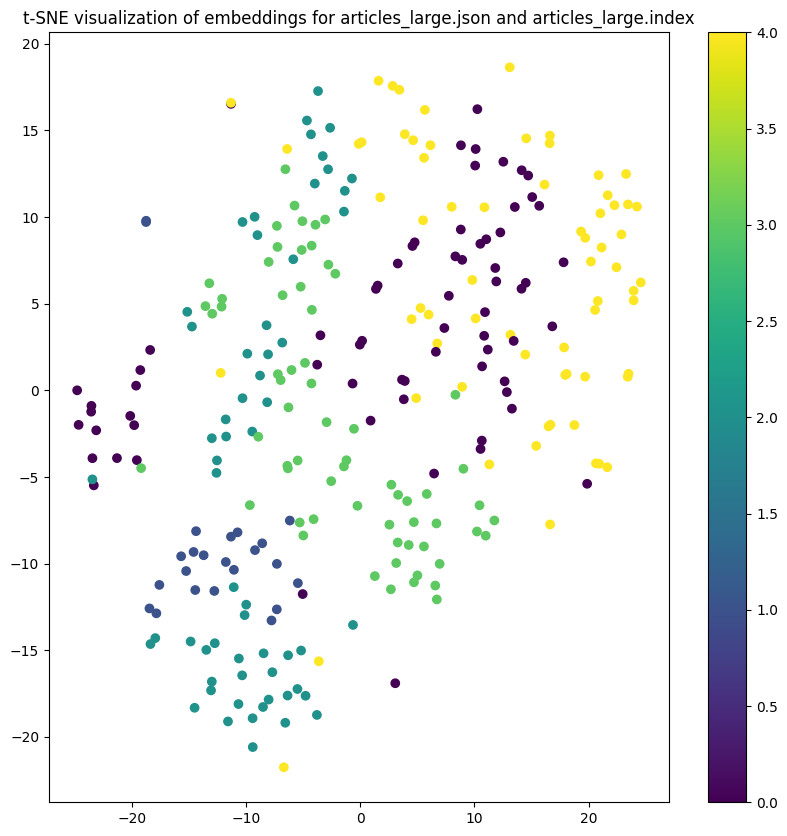

Article ID: 0, Distance: 0.0
Article ID: 23, Distance: 0.0
Article ID: 24, Distance: 0.4358878433704376
Article ID: 1, Distance: 0.43589693307876587
Article ID: 2, Distance: 0.5389398336410522


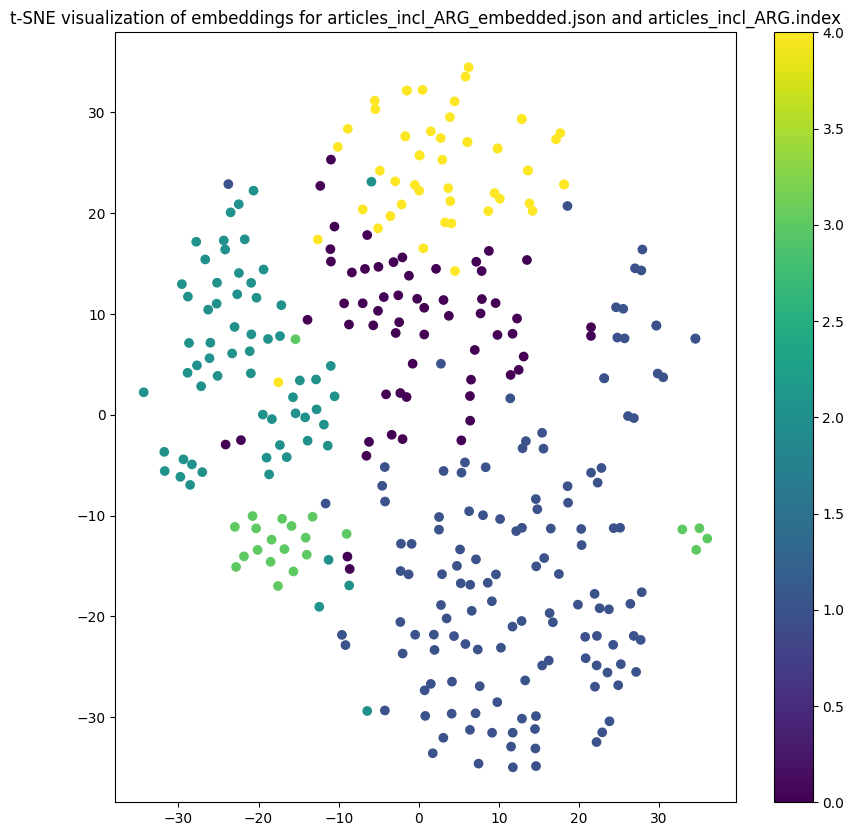

In [1]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
import os

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_model(json_files, index_files):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]), k)
            return I[0], D[0]

        # Evaluate with a few sample queries
        sample_query = data[0]['embedding']
        neighbors, distances = similarity_search(sample_query)
        for idx, distance in zip(neighbors, distances):
            print(f"Article ID: {idx}, Distance: {distance}")

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        
        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')
        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {json_file} and {index_file}")
        plt.show()

# Provide the correct paths to your files
evaluate_model(
    ["articles.json", "articles_large.json", "articles_incl_ARG_embedded.json"],
    ["articles.index", "articles_large.index", "articles_incl_ARG.index"]
)


3D Map Eval

Article ID: 0, Distance: 0.0
Article ID: 197, Distance: 0.7083922624588013
Article ID: 195, Distance: 0.7371349334716797
Article ID: 270, Distance: 0.7473189830780029
Article ID: 237, Distance: 0.7609228491783142
[[1.         0.50682347 0.58501819 ... 0.34945976 0.40087679 0.38085775]
 [0.50682347 1.         0.28213935 ... 0.32952468 0.52768926 0.54582376]
 [0.58501819 0.28213935 1.         ... 0.37172963 0.33867677 0.32645157]
 ...
 [0.34945976 0.32952468 0.37172963 ... 1.         0.33830417 0.38991511]
 [0.40087679 0.52768926 0.33867677 ... 0.33830417 1.         0.71497459]
 [0.38085775 0.54582376 0.32645157 ... 0.38991511 0.71497459 1.        ]]


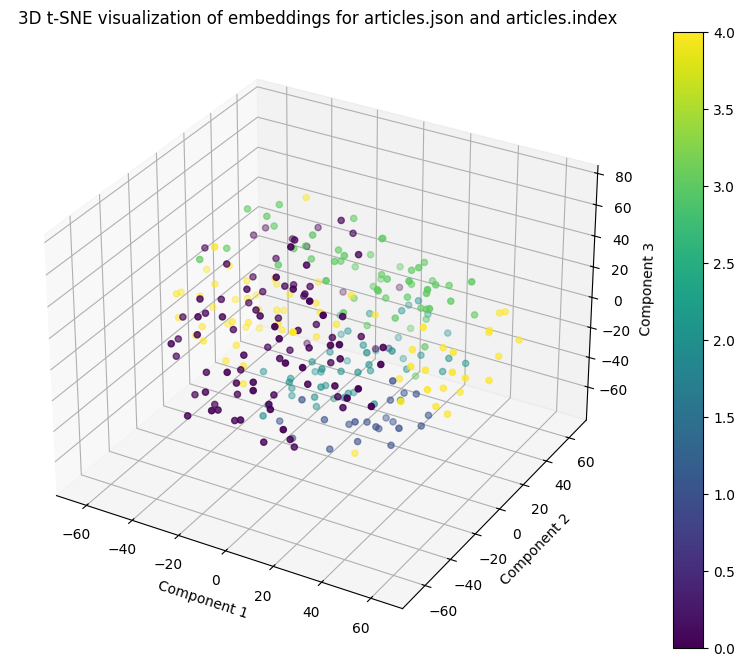

Article ID: 0, Distance: 0.0
Article ID: 195, Distance: 0.6746934652328491
Article ID: 197, Distance: 0.7724854946136475
Article ID: 184, Distance: 0.7762693762779236
Article ID: 1, Distance: 0.7864160537719727
[[1.         0.60679193 0.5921401  ... 0.33917554 0.39720856 0.37456758]
 [0.60679193 1.         0.38920361 ... 0.30925237 0.43054204 0.46320703]
 [0.5921401  0.38920361 1.         ... 0.38382737 0.31758766 0.28242322]
 ...
 [0.33917554 0.30925237 0.38382737 ... 1.         0.3072055  0.35258834]
 [0.39720856 0.43054204 0.31758766 ... 0.3072055  1.         0.645119  ]
 [0.37456758 0.46320703 0.28242322 ... 0.35258834 0.645119   1.        ]]


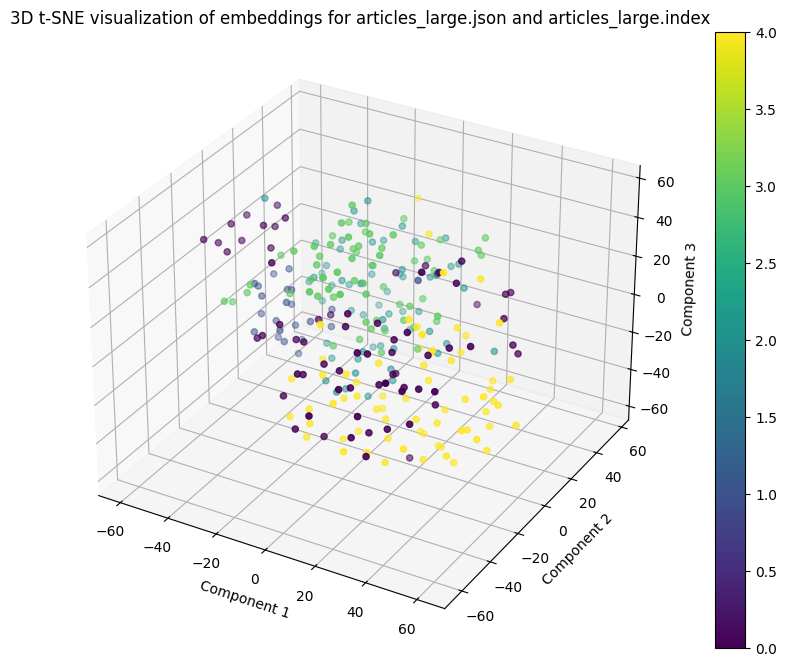

Article ID: 0, Distance: 0.0
Article ID: 23, Distance: 0.0
Article ID: 24, Distance: 0.4358878433704376
Article ID: 1, Distance: 0.43589693307876587
Article ID: 2, Distance: 0.5389398336410522
[[1.         0.78205153 0.73053009 ... 0.37176483 0.43848176 0.47728742]
 [0.78205153 1.         0.75773443 ... 0.31887857 0.46276074 0.44777736]
 [0.73053009 0.75773443 1.         ... 0.42447891 0.47023267 0.46219452]
 ...
 [0.37176483 0.31887857 0.42447891 ... 1.         0.33830417 0.38991511]
 [0.43848176 0.46276074 0.47023267 ... 0.33830417 1.         0.71497459]
 [0.47728742 0.44777736 0.46219452 ... 0.38991511 0.71497459 1.        ]]


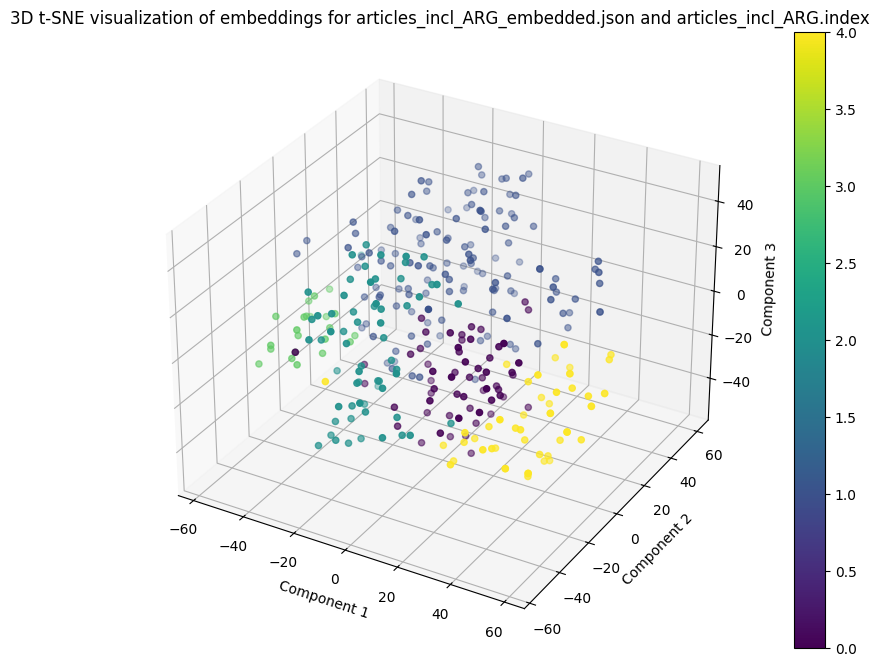

In [2]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import os

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_models(json_files, index_files):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]), k)
            return I[0], D[0]

        # Evaluate with a few sample queries
        sample_query = data[0]['embedding']
        neighbors, distances = similarity_search(sample_query)
        for idx, distance in zip(neighbors, distances):
            print(f"Article ID: {idx}, Distance: {distance}")

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        print(similarity_matrix)

        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with 3D t-SNE
        tsne = TSNE(n_components=3, random_state=0)
        embeddings_3d = tsne.fit_transform(embeddings)

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=labels, cmap='viridis')
        plt.colorbar(sc)
        ax.set_title(f"3D t-SNE visualization of embeddings for {json_file} and {index_file}")
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')

        plt.show()

# Provide the correct paths to your files
evaluate_models(
    ["articles.json", "articles_large.json", "articles_incl_ARG_embedded.json"],
    ["articles.index", "articles_large.index", "articles_incl_ARG.index"]
)


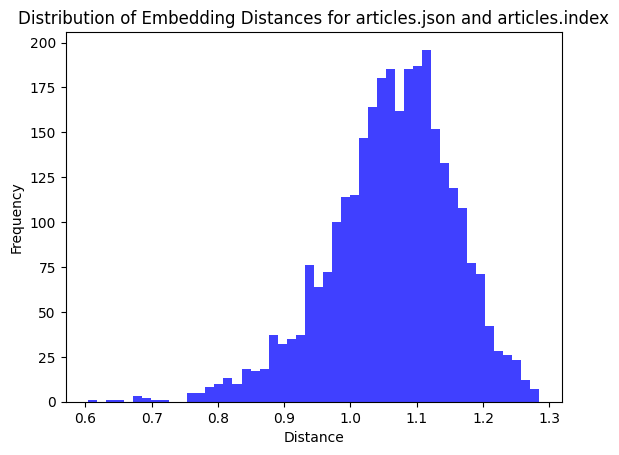

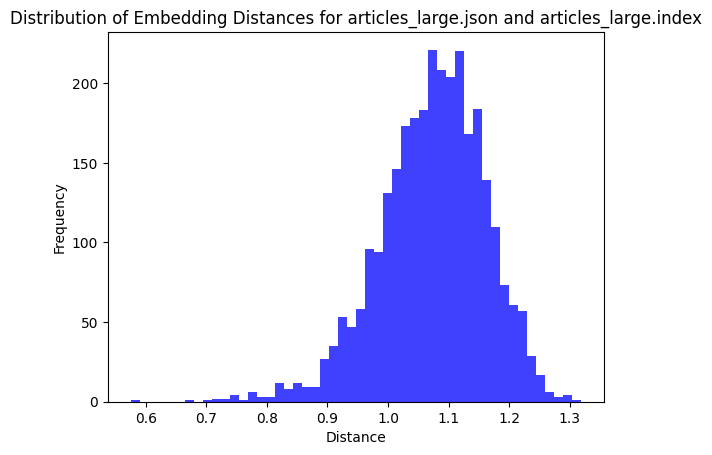

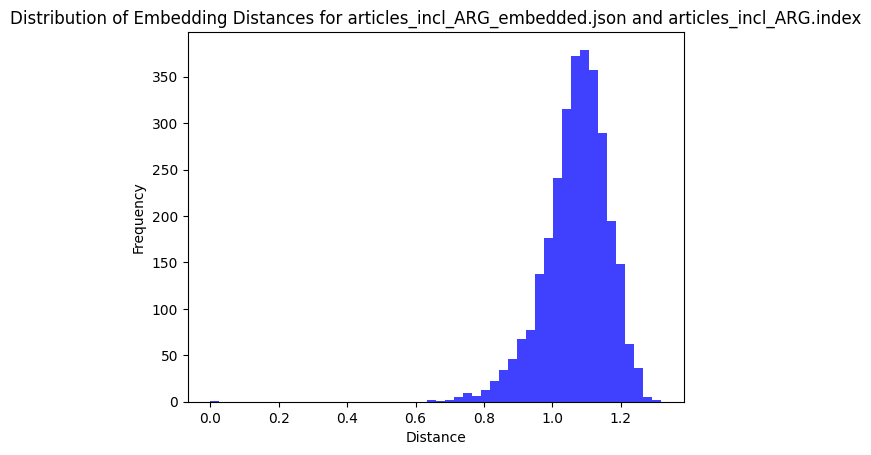

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
import json
import os

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_distance_distribution(json_files, index_files, sample_size=3000):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Calculate distances between a sample of pairs
        distances = []

        for _ in range(sample_size):
            idx1, idx2 = np.random.choice(len(embeddings), 2, replace=False)
            distance = np.linalg.norm(embeddings[idx1] - embeddings[idx2])
            distances.append(distance)

        # Plot the distribution of distances
        plt.hist(distances, bins=50, alpha=0.75, color='blue')
        plt.title(f"Distribution of Embedding Distances for {json_file} and {index_file}")
        plt.xlabel("Distance")
        plt.ylabel("Frequency")
        plt.show()

# Provide the correct paths to your files
evaluate_distance_distribution(
    ["articles.json", "articles_large.json", "articles_incl_ARG_embedded.json"],
    ["articles.index", "articles_large.index", "articles_incl_ARG.index"]
)


In [16]:
import openai
import numpy as np
import faiss
import json

def get_embedding(text, tags=[], model="text-embedding-3-large"):
    text = text.replace("\n", " ")
    combine = text + " " .join(tags)
    return openai.embeddings.create(input=[combine], model=model).data[0].embedding


# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Load your articles data
file_path = 'articles.json'
data = load_json(file_path)

# Load your FAISS index
index = faiss.read_index(model_type)

# Define a function to perform similarity search
def similarity_search(query_embedding, k=5):
    D, I = index.search(np.array([query_embedding]), k)
    return I[0], D[0]

# Example query
query_text = "Wann habe ich Mutterschaftsurlaub?"
query_tags = ["tag1", "tag2"]  # Replace with relevant tags

# Generate embedding for the query
query_embedding = get_embedding(query_text, query_tags)

# Perform similarity search
neighbors, distances = similarity_search(query_embedding)

# Display the results
print("Query:", query_text)
for idx, distance in zip(neighbors, distances):
    article = data[idx]
    print(f"\nArticle ID: {idx}")
    print(f"Distance: {distance}")
    print(f"Title: {article['title']}")
    print(f"Text: {article['text']}")



Query: Wann habe ich Mutterschaftsurlaub?

Article ID: 121
Distance: 0.6892930865287781
Title: Anspruch auf Mutterschaftsurlaub
Text: 1. Die Angestellte hat Anspruch auf einen bezahlten Mutterschaftsurlaub von insgesamt 16 Kalenderwochen, den sie frühestens zwei Wochen vor dem ärztlich bestimmten Geburtstermin antreten kann.
2. Ohne ärztliches Zeugnis werden Abwesenheiten von der Arbeit in den letzten zwei Wochen vor der Geburt auf den bezahlten Mutterschaftsurlaub angerechnet.
3. Muss die Angestellte ihre Tätigkeit wegen schwangerschaftsbedingter Beschwerden früher als zwei Wochen vor der Geburt niederlegen, besteht Lohnanspruch, wenn ein ärztliches Zeugnis vorgelegt wird.
4. Nach dem Mutterschaftsurlaub kann der Beschäftigungsgrad auf Gesuch der Angestellten unter Wahrung des Urlaubsanspruches reduziert werden, so weit die dienstlichen Verhältnisse es zulassen.
5. Im Rahmen der betrieblichen Möglichkeiten wird weiterer unbezahlter Urlaub bewilligt.

Article ID: 122
Distance: 0.870588

In [5]:
import numpy as np
import faiss
import json

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

file_path = 'articles.json'
data = load_json(file_path)

# Load your FAISS index and embeddings
index = faiss.read_index(model_type)
embeddings = np.array([article['embedding'] for article in data])

# Define a function to perform similarity search
def similarity_search(query_embedding, k=5):
    D, I = index.search(np.array([query_embedding]), k)
    return I[0], D[0]

# Get top 3 nearest neighbors for each article
top_n_neighbors = 3
neighbors_list = []

for i, article in enumerate(data):
    query_embedding = article['embedding']
    neighbors, distances = similarity_search(query_embedding, top_n_neighbors + 1)  # +1 to include the article itself
    neighbors_info = [{"Article ID": int(neighbor), "Distance": float(distance)} for neighbor, distance in zip(neighbors[1:], distances[1:])]
    neighbors_list.append({
        "Article ID": i,
        "Top Neighbors": neighbors_info
    })

# Save the results to a JSON file
output_file_path = 'article_neighbors.json'
with open(output_file_path, 'w', encoding='utf-8') as file:
    json.dump(neighbors_list, file, indent=4)

print(f"Top {top_n_neighbors} neighbors for each article have been saved to {output_file_path}.")


Top 3 neighbors for each article have been saved to article_neighbors.json.
